Problem statement: **FROM THE GIVEN IRIS DATASET,PREDICT THE OPTIMUM NUMBER OF CLUSTERS AND REPRESENT THEM VISUALLY.**

In [44]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [45]:
#Loading the iris dataset here
iris=datasets.load_iris()
irisdf= pd.DataFrame(iris.data, columns = iris.feature_names)

In [46]:
#To see the first 5 rows
irisdf.head() 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
#To see the last 5 rows
irisdf.tail() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [66]:
#find no of rows and columns
irisdf.shape


(150, 4)

In [67]:
irisdf= pd.DataFrame(iris.data, columns = iris.feature_names)
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
x = irisdf.iloc[:, [0, 1, 2, 3]].values

In [69]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
X=irisdf[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


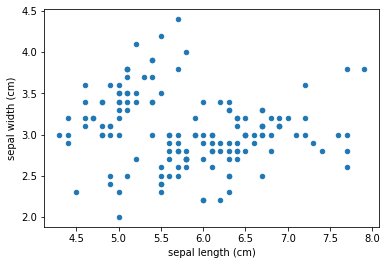

In [85]:
X.plot(x='sepal length (cm)',y='sepal width (cm)',kind='scatter')

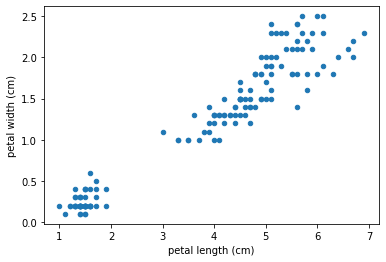

In [82]:
X.plot(x='petal length (cm)',y='petal width (cm)',kind='scatter')

#Finding the optimum number of clusters for k-means classification

In [70]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
   km=KMeans(n_clusters = i)
   km.fit(X)
   wcss.append(km.inertia_)

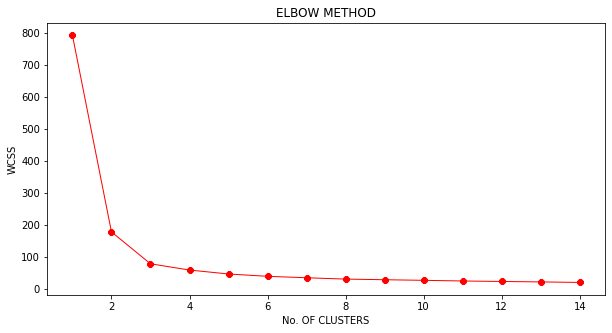

In [87]:
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss,linewidth=1,color='red',marker='8')
plt.title('ELBOW METHOD')
plt.ylabel('WCSS')
plt.xlabel('No. OF CLUSTERS')
plt.show()

From'The elbow method' graph above, we can identify that the elbow occurs where there is optimum clusters. This is when the WCSS (within cluster sum of squares)doesn't decrease significantly with each iteration. From this we may choose the number of clusters. i.e 3

In [88]:
#applying k-means
km=KMeans(n_clusters=3)

In [89]:
#model building
kmmodel=km.fit(X)

In [90]:
#predicting 
X['KMeans_cluster']=kmmodel.predict(X)

In [91]:
X['KMeans_cluster']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    2
148    1
149    1
Name: KMeans_cluster, Length: 150, dtype: int32

In [92]:
X.groupby(X['KMeans_cluster']).agg(['count','mean'])

sepal length (cm)            ... petal width (cm)          
                           count      mean  ...            count      mean
KMeans_cluster                              ...                           
0                             50  5.006000  ...               50  0.246000
1                             66  6.548485  ...               66  1.859091
2                             34  5.705882  ...               34  1.320588

[3 rows x 8 columns]

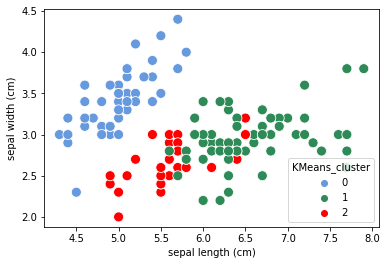

In [93]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='KMeans_cluster',palette=['#69d','seagreen','red'],data=X,s=100)

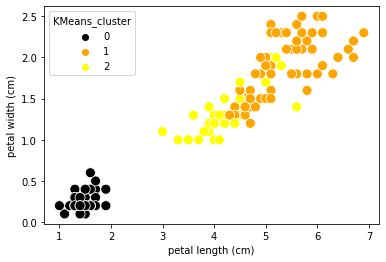

In [94]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='KMeans_cluster',palette=['black','orange','yellow'],data=X,s=100)